Please add your code and write-up to this notebook

Link to Repo: https://github.com/UC-Berkeley-I-School/200-FA25-EDA-SOCIALMEDIA

# Report Structure
1. Assumptions

2. Data Preparation

3. Descriptive Analysis

4. Addiction Analysis

5. Conflict Analysis

6. Relationship Factors


In [1]:
# importing necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/Students Social Media Addiction.csv")
pd.set_option('display.max_columns', None)

100%|██████████| 7.67k/7.67k [00:00<00:00, 14.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilshamim8/social-media-addiction-vs-relationships/versions/3


# 1. Assumptions




- Individuals scoring 7 or higher are considered addicted to social media
- The addiction scores reflect self-reported behavior, rather than verified phone usage data
- As long as a country had >1 representative we assumed it had a large enough sample size to include in the map


# 2. Data Preparation

- Our dataset had no NAs or duplicates, so no further cleaning was required.

- Data was encoded correctly with accurate data types


In [2]:
#
# Previewing the data
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
#
# Checking NAs
df.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [4]:
#
# Checking data types
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [5]:
#
# Checking duplicates
df.duplicated().sum()

np.int64(0)

# 3. Descriptive Analysis

In [6]:
#
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


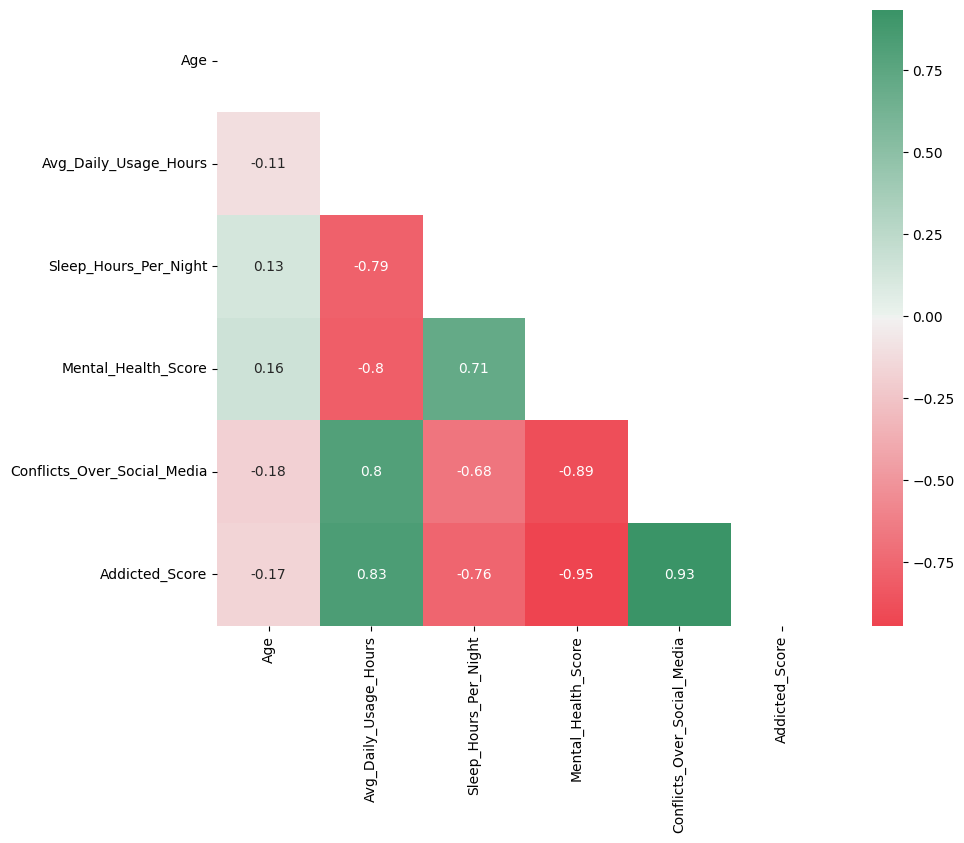

In [7]:
#
numeric_cols = [
    'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
    'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'
]

corr = df[numeric_cols].corr()

# cmap
cmap = sns.diverging_palette(10, 145, s=80, l=55, as_cmap=True)

# mask upper triangle INCLUDING diagonal
mask = np.triu(np.ones_like(corr, dtype=bool),k=0)

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, square=True)
plt.show()


This is a heatmap of correlations for this dataset's numeric values. This visual shows how the variables are correlated to each other.

**Age:**

Age is weakly correlated with all variables. As age increases, daily usage, social media conflicts, and addiction scores slightly decrease. This suggests that older individuals tend to use social media less, experience fewer conflicts, and report lower levels of addiction.

Age is also positively correlated with hours of sleep and mental health, indicating that older participants tend to sleep slightly more and report better mental health.

**Daily Usage: **

Average daily usage has a strong positive correlation with conflicts and addiction. This suggests that people who use platforms more experience more conflicts and addiction.

Daily usage has a strong negative correlation with mental health and hours of sleep, suggesting that people who use social media often rank lower with mental health and tend to get less sleep.

**Sleep per Night: **

Sleep per night has a strong negative correlation with conflicts and addiction. From this correlation, people who experience less sleep also experience more conflicts and addiction.

On the other hand, sleep is positively correlated with mental health, suggesting that more sleep means higher reported mental health.

**Mental Health: **

Mental health scores have a strong negative correlation with conflicts and addiction. From this correlation, we can assume that people who report lower mental health also experience more conflicts and are more addicted to social media platforms.

** Conflicts: **

Conflicts has a strong positive correlation with addiction, suggesting that users who experience many conflicts are also more addicted.

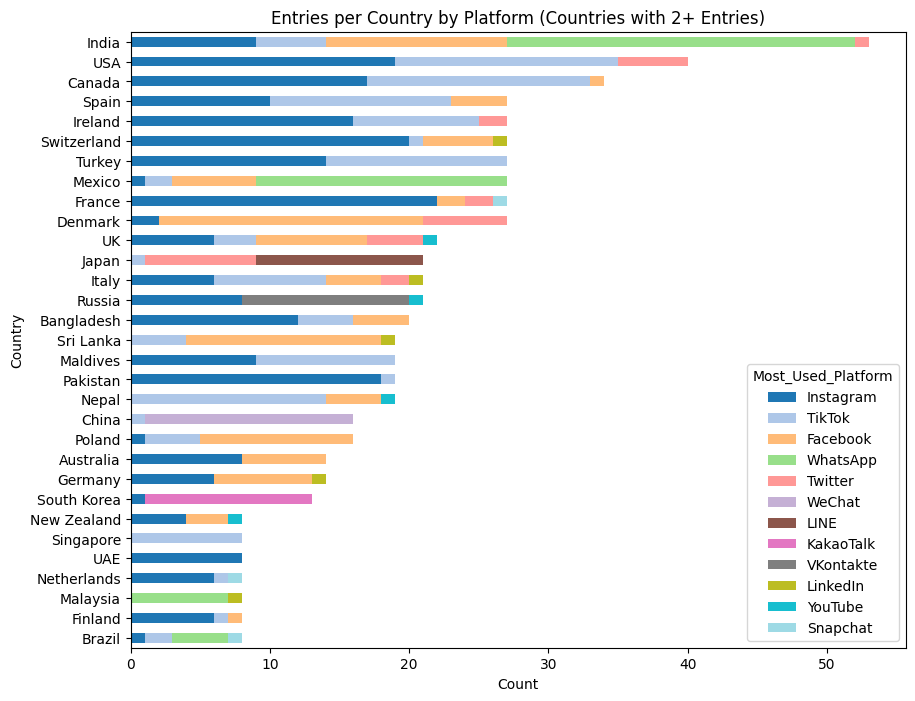

In [8]:
#
# Group and count
grouped = df.groupby(['Country', 'Most_Used_Platform']).size().unstack()

# Only include countries with more than 1 entry
country_totals = grouped.sum(axis=1)
grouped = grouped[country_totals > 1]

# Sort by total entries
grouped_sorted = grouped.sum(axis=1).sort_values(ascending=True)
grouped = grouped.loc[grouped_sorted.index]
grouped = grouped[grouped.sum(axis=0).sort_values(ascending=False).index]

# Plot
grouped.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    colormap='tab20'
)
plt.title("Entries per Country by Platform (Countries with 2+ Entries)")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

This is a stacked bar chart of Most Used Platform by Country. This chart shows the total counts of the report most used platform by country. 79 Countries had one respondent and were excluded from this chart.

**Highest Counts:**

India had the most entries in the dataset with WhatsApp being the most used platform. USA had the second most entries with Instagram and TikTok being the leading platforms. Canada is third in most total entries with Instagram and TikTok as the leading platforms.

**Lowest Counts:**

After excluding countries with one respondent, 7 countries remain as having the lowesat number of respoondents in the dataset: New Zealand, Singapore, UAE, Netherlands, Malaysia, Finland, and Brazil. For four of these countries, Instagram is the leading social media platform. For Malaysia and Brazil, the most common platform is Whatsapp. For Singapore, the most common platform is TikTok.

**Platform Use Across Countries:**

**Instagram** is reported as the most-used platform by respondents in many countries. However, in several countries (including Mexico, Denmark, Japan, Sri Lanka, Nepal, China, Poland, South Korea, Singapore, and Malaysia) few or no respondents selected Instagram as their primary platform.

**WhatsApp** is selected as the most-used platform by a smaller number of countries overall. However, among these, it shows notably high representation in India, Mexico, Malaysia, and Brazil, where many respondents report it as their primary platform.

**TikTok** is reported as the most-used platform by respondents across a wide range of countries, indicating broad global adoption. Only a few countries—Denmark, Australia, Germany, South Korea, New Zealand, and Malaysia—show little to no respondents identifying TikTok as their primary platform.

**WeChat** is reported as the most-used platform almost exclusively by respondents in China and does not appear as the dominant platform in other countries.


# 4. Addiction Analysis

<h2>Which countries are the most and least addicted?</h2>

In [9]:
# 
to_drop = df["Country"].value_counts()[df["Country"].value_counts() == 1].index# removing all countries that have 1 person
print(f'There are {(df["Country"].value_counts() == 1).sum()} countries with only one respondent so we removed all these countries for the analysis.')
dropped_countries = to_drop.values

temp = df[~df['Country'].isin(to_drop)]
addicted_countries = temp.groupby('Country')['Addicted_Score'].mean().sort_values(ascending=False)

print(f"The most addicted country is the {addicted_countries.iloc[np.where(addicted_countries == addicted_countries.max())[0]].index.values[0]} with an addiction score of {addicted_countries.max()} ")
print(f"The least addicted country is {addicted_countries.iloc[np.where(addicted_countries == addicted_countries.min())[0]].index.values[0]} with an addiction score of {round(addicted_countries.min(),1)} ")

plot_addicted_countries = addicted_countries.reset_index(drop = False)

# threshold where student/country is considered "severely addicted"
country_addicted_threshold = 7
print(f"The following countries have severe addiction issues: {list(plot_addicted_countries[plot_addicted_countries['Addicted_Score']>country_addicted_threshold].Country)}")
# Choropleth
fig = px.choropleth(
    plot_addicted_countries,
    locations="Country",              # Column with country names
    locationmode="country names",     # Match on country names
    color="Addicted_Score",           # Column with values to color
    color_continuous_scale="Reds",    # Color scale (Blues, Viridis, Reds, etc.)
    title="Mean Social Media Addiction Scores Across Countries"
)

fig.update_layout(
    width=1000,   # increase width
    height=600,   # increase height
    margin={"r":0,"t":50,"l":0,"b":0},  # tighten margins

    geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular")
)

fig.show()

There are 79 countries with only one respondent so we removed all these countries for the analysis.
The most addicted country is the USA with an addiction score of 8.6 
The least addicted country is Japan with an addiction score of 3.5 
The following countries have severe addiction issues: ['USA', 'UAE', 'India', 'Bangladesh', 'Pakistan', 'Mexico', 'Turkey', 'Spain', 'UK', 'Brazil']


There are 79 countries with only one respondent so we removed all these countries for the analysis.
The countries that have been removed are as follows Austria, Thailand, Philippines, Taiwan, Indonesia, Hong Kong, Israel, Egypt, Morocco, Vietnam, Belgium, Greece, Portugal, Sweden, Norway, Chile, Argentina, Ghana, Kenya, Nigeria, South Africa, Colombia, Peru, Costa Rica, Bolivia, Panama, Jamaica, Uruguay, Paraguay, Venezuela, Ecuador, Hungary, Czech Republic, Slovakia, Croatia, Serbia, Slovenia, Bulgaria, Estonia, Latvia, Lithuania, Ukraine, Moldova, Bahamas, Trinidad, Iceland, Romania, Kyrgyzstan, Uzbekistan, Kazakhstan, Belarus, Tajikistan, Armenia, Georgia, Azerbaijan, Andorra, San Marino, Vatican City, Liechtenstein, Cyprus, Malta, Luxembourg, Monaco, Kosovo, North Macedonia, Albania, Montenegro, Bosnia, Qatar, Kuwait, Bahrain, Iraq, Lebanon, Jordan, Oman, Afghanistan, Syria, Yemen, Bhutan
<br><br>
Addiction score ranges from 0-9
The most addicted country is the USA with an addiction score of 8.6.
The least addicted country is Japan with an addiction score of 3.5
<br><br>
It is interesting to note that western hemisphere and South Asia tends to have higher addicted  score than the rest of the world. This may be because India, USA, and Canada had the most respondents out of any countries with 53, 40, and 34 respondents respectively.
<br><br>
We defined countries with severe addiction issues to be the countries which have a mean addicted score greater than 7. The following ten countries were defined as severely addicted USA, UAE,  India, Bangladesh, Pakistan, Mexico, Turkey, Spain, UK, and Brazil.

Most of these countries match our assumptions of which countries would be the most addicted. We were surprised to see Turkey on the severe addiction list as the country does not have a reputation for rampant social media use. We were also surprised that the UAE made the list as it is another country that doesn't have the same reputation for rampant social media use as countries like the USA and South Asia.

We think the UAE's high mean addiction score may be due to Dubai being in the UAE. Dubai is a westernized city with lots of expats from the West and South Asia, maybe this is the reason why we see such high mean addicted score. It would be interesting to collect more data from Middle Eastern countries to see if the UAE's high mean addiction score is unique amongst Middle Eastern countries.


<h2>Does addiction to different platforms differ by gender?</h2>

Average Women's Addiction Score: 6.51558
Average Men's Addiction Score: 6.35795
Number of Women: 353
Number of Men: 352
Mean Average Daily Usage Regardless of Gender: 4.91872
Median Average Daily Usage Regardless of Gender: 4.8
Mean Average Daily Usage for Men: 4.82614
Mean Average Daily Usage for Women: 5.01105



/tmp/ipython-input-2035777165.py:31: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/tmp/ipython-input-2035777165.py:41: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



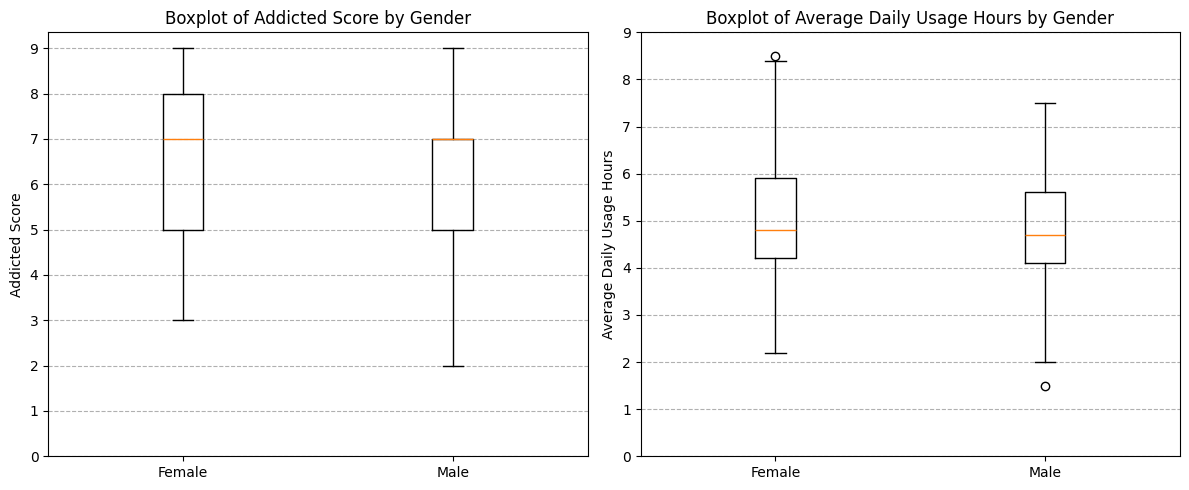

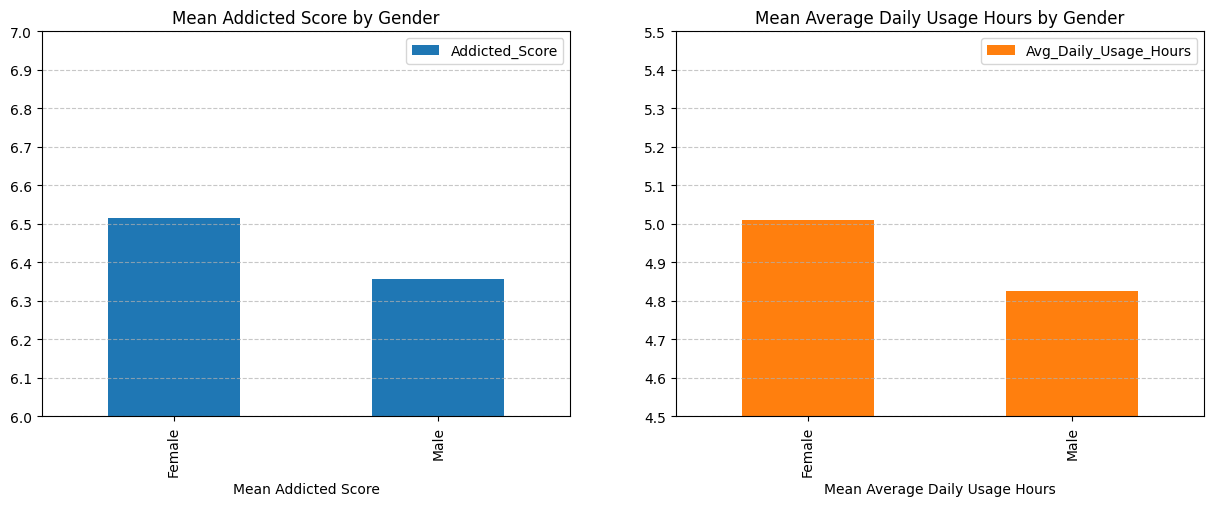

In [10]:
#
addicted_grouped = df.groupby('Gender')['Addicted_Score'].describe()
women_mean_addiction_score = round(addicted_grouped.loc['Female', 'mean'],5)
men_mean_addiction_score = round(addicted_grouped.loc['Male', 'mean'],5)
num_women = int(addicted_grouped.loc['Female', 'count'])
num_men =int(addicted_grouped.loc['Male', 'count'])


print(f"Average Women's Addiction Score: {women_mean_addiction_score}")
print(f"Average Men's Addiction Score: {men_mean_addiction_score}")
print(f"Number of Women: {num_women}")
print(f"Number of Men: {num_men}")
print(f"Mean Average Daily Usage Regardless of Gender: {round(df['Avg_Daily_Usage_Hours'].mean(),5)}")
print(f"Median Average Daily Usage Regardless of Gender: {round(df['Avg_Daily_Usage_Hours'].median(),5)}")
print(f"Mean Average Daily Usage for Men: {round(df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().loc['Male'],5)}")
print(f"Mean Average Daily Usage for Women: {round(df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().loc['Female'],5)}")
print()


# Define y limits and ticks
y_lim1 = (0, 9)
y_ticks1 = np.linspace(start=y_lim1[0], stop=y_lim1[1], num=10)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First boxplot: Addicted Score ---
plot_df1 = df.groupby('Gender')['Addicted_Score']
data1 = [plot_df1.get_group(g) for g in plot_df1.groups]

axes[0].boxplot(data1, labels=plot_df1.groups.keys())
axes[0].grid(axis = 'y', linestyle = '--')
axes[0].set_title("Boxplot of Addicted Score by Gender")
axes[0].set_ylabel("Addicted Score")
axes[0].set_yticks(y_ticks1)

# --- Second boxplot: Avg Daily Usage Hours ---
plot_df2 = df.groupby('Gender')['Avg_Daily_Usage_Hours']
data2 = [plot_df2.get_group(g) for g in plot_df2.groups]

axes[1].boxplot(data2, labels=plot_df2.groups.keys())
axes[1].grid(axis = 'y', linestyle = '--')
axes[1].set_title("Boxplot of Average Daily Usage Hours by Gender")
axes[1].set_ylabel("Average Daily Usage Hours")
axes[1].set_yticks(y_ticks1)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

###########################################
y_lim1 = (6,7)
y_ticks1 = np.linspace(start=y_lim1[0], stop = y_lim1[1], num=11)

y_lim2 = (4.5,5.5)
y_ticks2 = np.linspace(start=y_lim2[0], stop = y_lim2[1], num=11)


plot_df1 = df.groupby('Gender')[['Addicted_Score', 'Avg_Daily_Usage_Hours']]
ax = plot_df1.mean().plot(kind = 'bar', layout = (1,2), figsize=(15,5), subplots = True)
ax1 = ax[0][0]
ax2 = ax[0][1]
ax1.set_title("Mean Addicted Score by Gender")
ax1.set_xlabel("Mean Addicted Score")
ax1.set_ylim(y_lim1)
ax1.set_yticks(y_ticks1)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

######### Average Daily Usage Hours#######
ax2.set_title("Mean Average Daily Usage Hours by Gender")
ax2.set_xlabel("Mean Average Daily Usage Hours")
ax2.set_ylim(y_lim2)
ax2.set_yticks(y_ticks2)
ax2.grid(axis="y", linestyle="--", alpha=0.7)


Women are very slightly more prone to social media addiction as women have a mean addicted score of 6.51558 while men have a mean addicted score of 6.35795.
The quantiles are identical except women have a slightly higher addiction score for Q3 and the Min. This is why we see women being slightly skewed towards addiction vs men.
It is also interesting that our sample size for men and women are nearly equal with 353 women and 352 men.

The average daily usage hours regardless of gender is 4.919 and the median is 4.8
On average women use social media more than men. The average daily usage for women was 5.011 hours while the average daily usage for men is 4.826
It is interesting to note that across each quantile as well as the min and the max, women consistently show higher average daily usage yet the difference in addiction is not as high as the difference in usage

In [11]:
# 

# threshold where student is considered "addicted"
addicted_threshold = 7

# boolean column: is this student addicted?
df["Is_Addicted"] = df["Addicted_Score"] >= addicted_threshold

In [12]:
#

# create platform statistics
platform_stats = (
    df.groupby("Most_Used_Platform")
      .agg(
          mean_addicted_score=("Addicted_Score", "mean"),
          addicted_share=("Is_Addicted", "mean"),
          mean_usage_hours=("Avg_Daily_Usage_Hours", "mean"),
          num_students=("Student_ID", "count")
      )
      .sort_values("mean_addicted_score", ascending=False)
)

# clean column names
clean_table = (
    platform_stats
    .round({
        "mean_addicted_score": 2,
        "addicted_share": 2,
        "mean_usage_hours": 2
    })
    .reset_index()
    .rename(columns={
        "Most_Used_Platform": "Platform",
        "mean_addicted_score": "Mean Addiction Score",
        "addicted_share": "Addiction Rate",
        "mean_usage_hours": "Avg Daily Hours",
        "num_students": "Number of Students"
    })
)

# make pretty
styled = (
    clean_table.style
    .set_caption("Social Media Addiction by Platform")
    .format({
        "Mean Addiction Score": "{:.2f}",
        "Addiction Rate": "{:.2f}",
        "Avg Daily Hours": "{:.2f}",
        "Number of Students": "{:d}"
    })
    .set_table_styles([
        {"selector": "caption",
         "props": [("caption-side", "top"),
                   ("font-size", "14px"),
                   ("font-weight", "bold"),
                   ("text-align", "left")]},
        {"selector": "th",
         "props": [("background-color", "gray"),
                   ("font-weight", "bold"),
                   ("text-align", "center")]},
        {"selector": ".row_heading, .blank",
         "props": [("display", "none")]}
    ], overwrite=False)
    .background_gradient(subset=["Mean Addiction Score"], cmap="viridis_r")
)

styled

,Platform,Mean Addiction Score,Addiction Rate,Avg Daily Hours,Number of Students
0,WhatsApp,7.46,1.00,6.48,54
1,Snapchat,7.46,0.92,5.09,13
2,TikTok,7.43,0.86,5.35,154
3,Instagram,6.55,0.61,4.87,249
4,YouTube,6.10,0.30,4.08,10
5,WeChat,6.07,0.53,4.96,15
6,KakaoTalk,6.00,0.00,4.73,12
7,Facebook,5.67,0.28,4.51,123
8,Twitter,5.50,0.37,4.87,30
9,VKontakte,5.00,0.00,4.25,12


: Which platform is the most addictive?


To examine which social media platform appears to be the most addictive among students in this dataset, we compared platforms on three primary metrics: mean addiction score, average daily usage hours, and sample size. A fourth metric, addiction rate, represents the proportion of that platform’s users that are addicted to social media. We created a binary variable for being addicted to social media. If a student reports an addiction score of 7 or higher, they are considered addicted. If a student’s addiction score is below 7, they are considered not addicted to social media. Therefore, one can interpret the “addiction rate” column as the proportion of users with an addiction score of 7 or greater.


The above table shows each of these statistics by students’ self-reported most used platform. The results demonstrate a clear pattern. The four most addictive platforms by mean addiction score are WhatsApp, Snapchat, TikTok, and Instagram. WhatsApp and Snapchat have the same mean addiction score of 7.46, with the other two platforms closely behind at 7.43 and 6.55, respectively. 100% of students who reported WhatsApp as their most used platform meet the addiction score threshold of 7 or greater. 92% of Snapchat users are addicted to social media according to this metric also. TikTok and Instagram users have lower addiction rates at 86% and 61%, respectively.


WhatsApp users have the highest daily average hours with nearly 6.5 hours. Snapchat, TikTok, and Instagram all have average daily hours in the 5 hour range at 5.09, 5.35, and 4.87, respectively. It is important to note, however, that although TikTok and Instagram are not considered as addictive as WhatsApp and Snapchat by the metrics we used, we do recognize the difference in sample size across these platforms. The number of students reporting WhatsApp as their most used social media is a smaller sample than those reporting TikTok and Instagram. While WhatsApp has 54 students, TikTok has 154, and Instagram has 249. Snapchat has an even smaller sample size at 13 students.


/tmp/ipython-input-2888611630.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




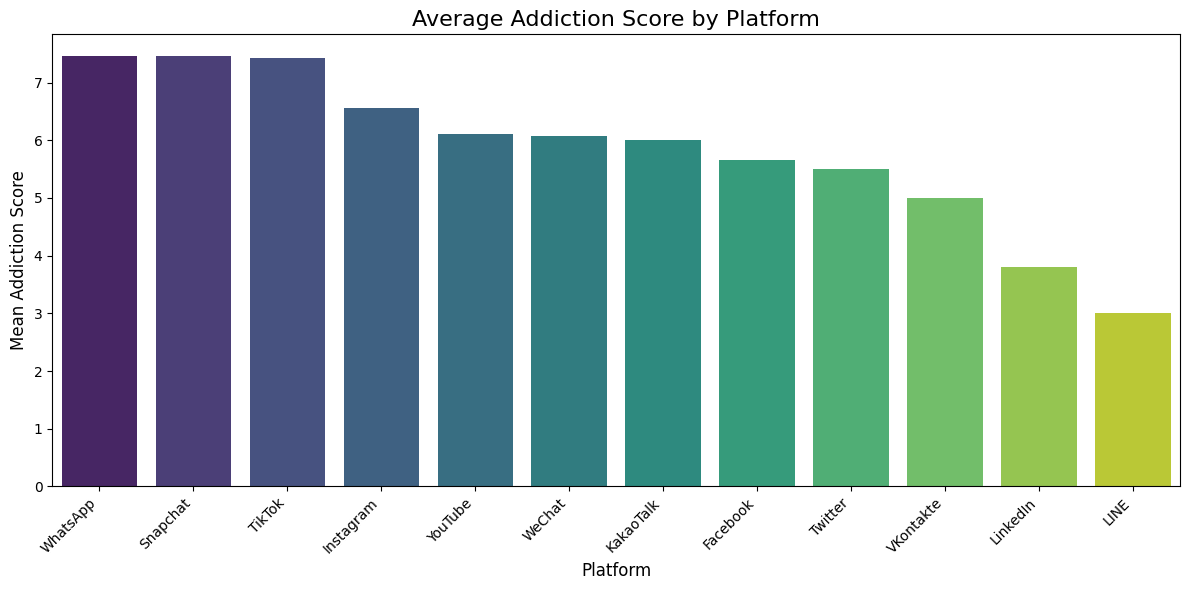

In [13]:
#
# make graph
plt.figure(figsize=(12, 6))
sns.barplot(
    data=platform_stats.reset_index(),
    x="Most_Used_Platform",
    y="mean_addicted_score",
    palette="viridis"
)

plt.title("Average Addiction Score by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Mean Addiction Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

: Which platform is the most addictive?


The above bar chart demonstrates the average addiction score by students’ self-reported most used social media platform. Both the height of the bars and the color of the bars represent how addictive the social media platform is based on the mean addiction score of its users. The colors transition from purple to blue to green. Purple indicates a higher mean addiction score and green indicates a lower mean addiction score. According to this metric, the most addictive platforms are WhatsApp, Snapchat, TikTok and Instagram. The least addictive platforms are Twitter, VKontakte, LinkedIn, and LINE. While this graph is certainly a helpful visual representation of average addiction score by social media platform, it is important to note that this bar chart alone does not tell the full story. The table provides a more comprehensive view into the addictiveness of different platforms, whereas this bar chart offers a simplistic high-level overview to comprehend the key points.



Academic levels ranked by vulnerability to addiction
                mean_addicted_score  addicted_share  mean_usage_hours  \
Academic_Level                                                          
High School                8.037037        0.925926          5.544444   
Undergraduate              6.492918        0.563739          5.001416   
Graduate                   6.243077        0.566154          4.776923   

                num_students  
Academic_Level                
High School               27  
Undergraduate            353  
Graduate                 325   



/tmp/ipython-input-3304104592.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3304104592.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




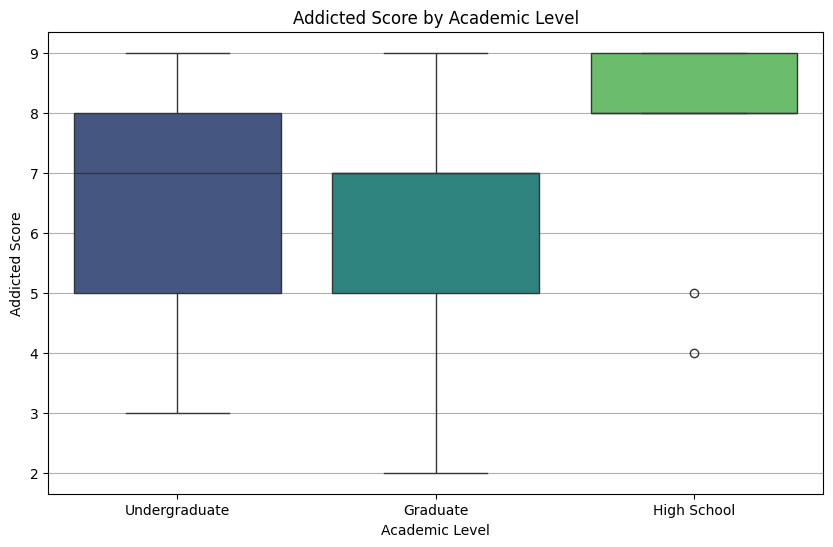

In [14]:
#
#What academic level is most vulnerable to addiction?

academic_stats = (
    df.groupby("Academic_Level")
      .agg(
          mean_addicted_score=("Addicted_Score", "mean"),
          addicted_share=("Is_Addicted", "mean"),
          mean_usage_hours=("Avg_Daily_Usage_Hours", "mean"),
          num_students=("Student_ID", "count")
      )
      .sort_values("mean_addicted_score", ascending=False)
)

print("Academic levels ranked by vulnerability to addiction")
print(academic_stats[["mean_addicted_score", "addicted_share", "mean_usage_hours", "num_students"]], "\n")

# Create bar plot
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(10,6))
sns.barplot(
    data=academic_stats,
    x="Academic_Level",
    y="mean_addicted_score",
    palette="viridis"
)
plt.grid(True, which='both', axis='y')
plt.xlabel("Academic Level")
plt.ylabel("Mean Addicted Score")
plt.title("Average Addicted Score by Academic Level")
plt.ylim(bottom=5)

# Create box plot
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Academic_Level",
    y="Addicted_Score",
    palette="viridis"
)
plt.xlabel("Academic Level")
plt.ylabel("Addicted Score")
plt.title("Addicted Score by Academic Level")
plt.grid(True, which='both', axis='y')

addicted_share = (
    df.groupby("Academic_Level")["Is_Addicted"]
      .mean()
      .sort_values(ascending=False)
)


What academic level is most vulnerable to addiction?

High School students appear to be the group most vulnerable to social media addiction in our dataset, based on consistent patterns across several indicators. When comparing mean addiction scores across academic levels, High School students display notably higher levels of problematic use than both Undergraduates and Graduate students. Their average addiction score is 8.04, which is above the threshold of 7 that we defined as indicating addiction. Undergraduates average 6.49 and Graduate students average 6.24, meaning that the typical respondent in each of these older groups does not meet the criteria for addiction. The fact that the average High School student exceeds the threshold suggests that problematic social media use is particularly common in this younger population.

The proportion of individuals who reach the addiction threshold strengthens this pattern. A total of 92.6 percent of High School respondents scored 7 or higher, which makes this group the only one in which nearly every participant qualifies as addicted. Undergraduates and Graduate students both have addiction rates of around 56 percent, which reflects a much wider distribution of scores and a greater number of individuals who fall below the cutoff. This difference indicates that adolescents may be more susceptible to compulsive or excessive social media behavior.

Reported daily usage hours also add important context. High School students report an average of 5.54 hours per day on social media. Undergraduates report 5.00 hours and Graduate students report 4.78 hours. Although these differences are not dramatic in size, they match the overall trend reflected in the addiction scores. The group that spends the most time on social platforms is also the group that records the highest addiction levels. This consistency across indicators suggests a meaningful relationship between time spent online and the likelihood of meeting the criteria for addiction.

There are several limitations that should be acknowledged. The High School sample contains 27 students, which is much smaller than the samples for the other academic levels. A smaller sample can reduce the extent to which findings represent the broader population of High School students, and the results for this group should be interpreted with care. In addition, all measures rely on self reported data. We did not have access to actual device usage logs or phone activity records, which means that responses may include recall errors or estimation biases. Even with these limitations, the relative differences between academic levels still offer valuable insight.

Overall, the combination of the highest average addiction score, the highest percentage of individuals meeting the addiction threshold, and the highest reported daily usage hours suggests that High School students are the group most at risk for social media addiction in this dataset. These findings indicate that adolescents may benefit from additional guidance, support, or further study focused on their patterns of digital engagement.

# 5. Conflict Analysis

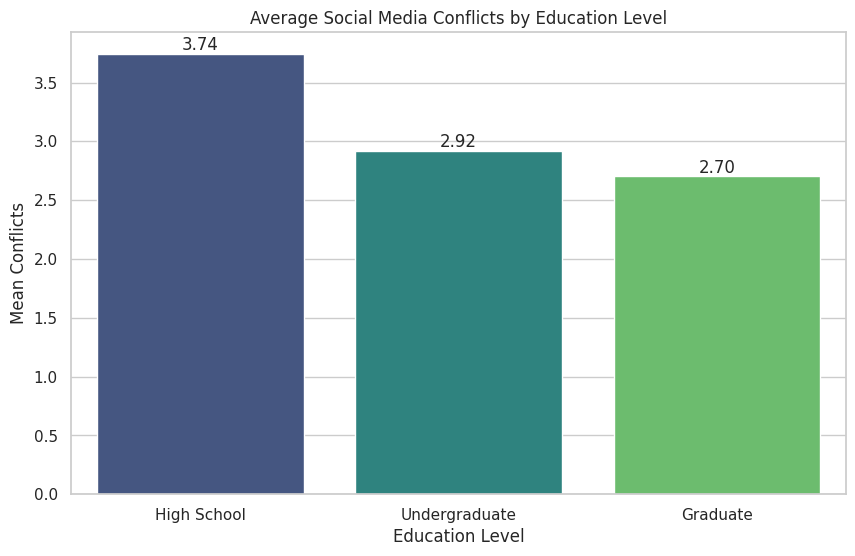

In [15]:
#

# Are high schoolers more prone to social media conflicts ?

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df,
    x='Academic_Level',
    y='Conflicts_Over_Social_Media',
    estimator='mean',
    errorbar=None,
    palette='viridis',
    order=['High School', 'Undergraduate', 'Graduate']
)

# 3. Add Title and Axis Labels
plt.title('Average Social Media Conflicts by Education Level', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Mean Conflicts', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


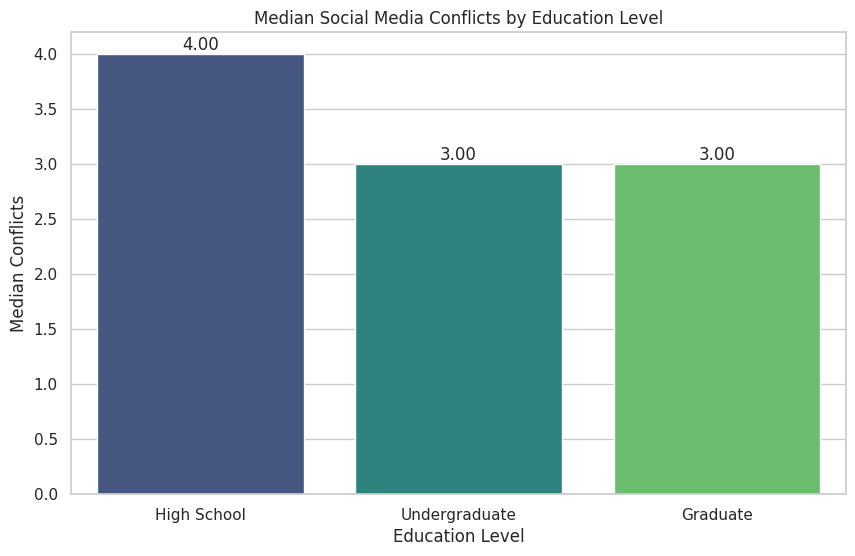

In [16]:
#

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df,
    x='Academic_Level',
    y='Conflicts_Over_Social_Media',
    estimator='median',
    errorbar=None,
    palette='viridis',
    order=['High School', 'Undergraduate', 'Graduate']
)

# 3. Add Title and Axis Labels
plt.title('Median Social Media Conflicts by Education Level', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Median Conflicts', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [17]:
edu_level = df.groupby('Academic_Level')['Conflicts_Over_Social_Media'].describe()
edu_level

,count,mean,std,min,25%,50%,75%,max
Academic_Level,,,,,,,,
Graduate,325.0,2.701538,0.962329,0.0,2.0,3.0,3.0,5.0
High School,27.0,3.740741,0.813000,1.0,4.0,4.0,4.0,4.0
Undergraduate,353.0,2.917847,0.921057,1.0,2.0,3.0,4.0,5.0


<h2>

**High schoolers are more prone to conflicts over social media**

To understand the relationship between academic level and social media conflicts, we examined the mean, median, and distribution of 'Conflicts_Over_Social_Media' scores across High School, Undergraduate, and Graduate students. The data consistently shows that high schoolers report a higher propensity for conflicts related to social media usage.

From the descriptive statistics (`edu_level` output), High School students have a mean conflict score of **3.74**, which is notably higher than Undergraduates (**2.92**) and Graduates (**2.70**). Similarly, the median conflict score for High Schoolers is **4.0**, while both Undergraduates and Graduates have a median of **3.0**. These central tendency measures indicate that, on average, High School students experience more social media-related conflicts.

The bar plots visualizing the mean and median conflicts by education level further illustrate this trend, clearly showing the taller bars for 'High School' compared to the other academic levels. The violin plot, which visualizes the distribution of conflict scores, provides additional insight. For High School students, the violin plot shows a pronounced concentration around a conflict score of **4.0**, indicating that a significant portion of this group reports this specific conflict level. In contrast, the distributions for Undergraduate and Graduate students are wider and appear multimodal, suggesting a more varied range of conflict experiences within those groups.

It is important to acknowledge the difference in sample sizes when interpreting these findings. The High School group consists of **27** respondents, while there are **353** Undergraduates and **325** Graduates. This smaller sample size for High Schoolers means that the results, while indicative, should be interpreted with caution regarding their generalizability to the broader high school population. However, within this dataset, the pattern of higher conflict scores among high schoolers is consistent across multiple statistical measures and visualizations.


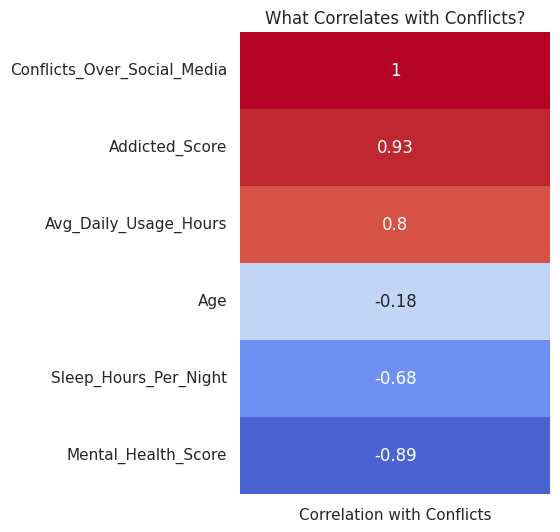

In [18]:
# What's the best way to predict conflicts over social media use ?

target_corr = df[[ 'Age',
       'Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night',
       'Mental_Health_Score',
       'Conflicts_Over_Social_Media', 'Addicted_Score']].corrwith(df['Conflicts_Over_Social_Media'])

# 2. Convert it to a DataFrame so Seaborn can plot it
target_corr_df = target_corr.sort_values(ascending=False).to_frame(name='Correlation with Conflicts')

# 3. Plot a narrow heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr_df,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            cbar=False)
plt.title('What Correlates with Conflicts?')
plt.show()

<h5>
We can see that the best way to predict conflicts over social media is by looking at the addicted score, which shows very strong positive correlation. The next best metric to look at is the mental health score, which shows strong negative correlation.
</h5>

# 6. Relationship Factors

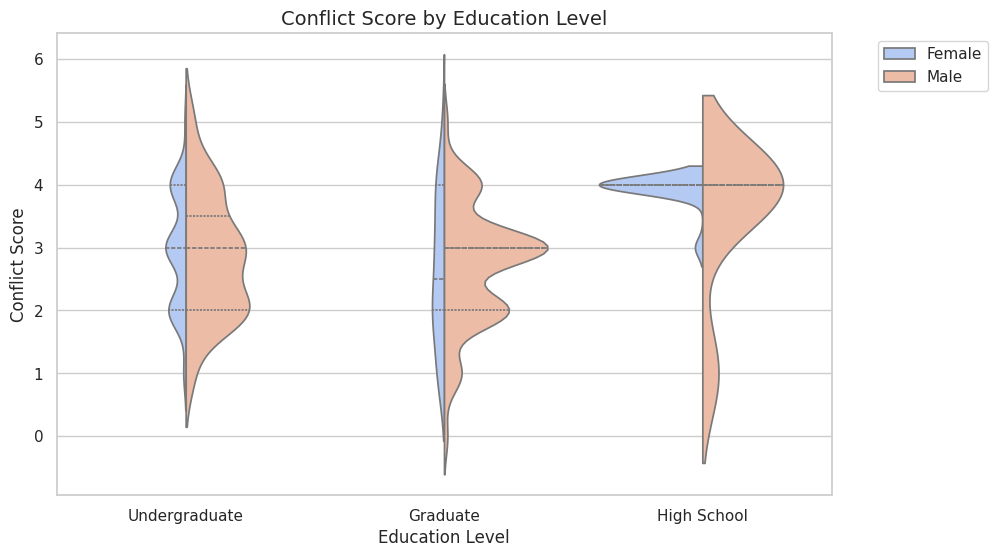

In [19]:
#

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x='Academic_Level',
    y='Conflicts_Over_Social_Media',
    palette='coolwarm', inner = 'quartile', hue = 'Gender',split = True

)
plt.title('Conflict Score by Education Level', fontsize=14)
plt.ylabel('Conflict Score')
plt.xlabel('Education Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

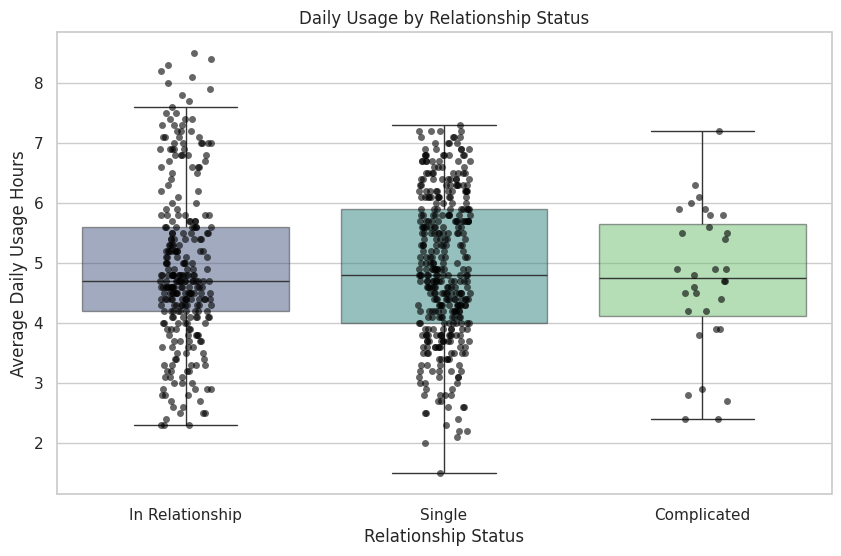

In [20]:
# Does relationship status affect social media usage ?

plt.figure(figsize=(10, 6))

# boxprops={'alpha': 0.5} makes the boxes semi-transparent so points stand out
sns.boxplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours',
            showfliers=False, boxprops={'alpha': 0.5},palette='viridis',
            hue = None)

# 2. Overlay the individual points
# jitter=True spreads them out horizontally so they don't overlap perfectly
sns.stripplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours'
,color='black', alpha=0.6, jitter=True)

plt.title('Daily Usage by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Average Daily Usage Hours')
plt.show()


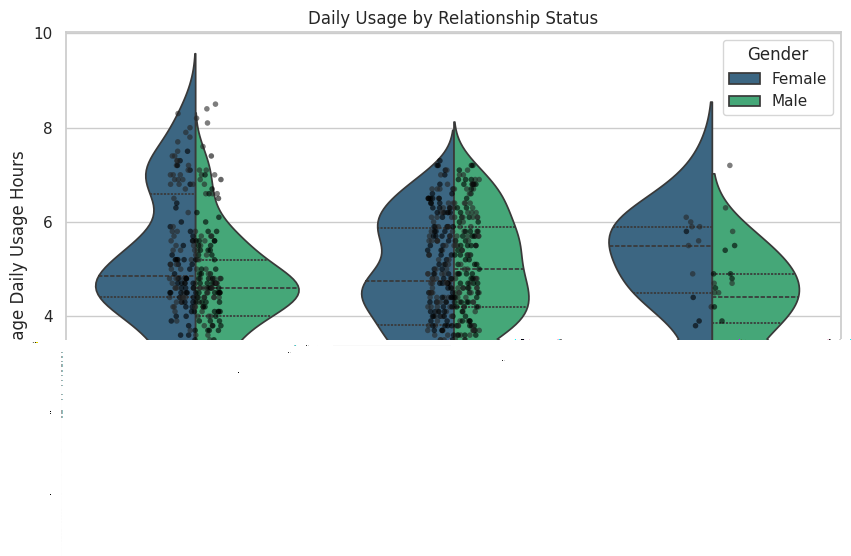

In [21]:

# Suppress all FutureWarning messages
warnings.filterwarnings('ignore', category=FutureWarning)

# Suppress all DeprecationWarning messages
warnings.filterwarnings('ignore', category=DeprecationWarning)
plt.figure(figsize=(10, 6))

# 1. Draw the Split Violin Plot
# split=True draws the two hue groups (Female/Male) as half-violins back-to-back.

sns.violinplot(
    data=df,
    x='Relationship_Status',
    y='Avg_Daily_Usage_Hours',
    hue='Gender',
    split=True,
    inner='quartile',
    palette='viridis'
)

# 2. Overlay the Individual Points (The Jitters)
# We must use dodge=False so the points align perfectly with the split violins.
sns.stripplot(
    data=df,
    x='Relationship_Status',
    y='Avg_Daily_Usage_Hours',
    hue='Gender',
    dodge=False, # Crucial for aligning points with split violins
    color='black',
    alpha=0.6,
    size=4
)

# Set the title and ensure the legend is displayed only once
plt.title('Daily Usage by Relationship Status')

# Optional: Get current handles and labels, and remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title='Gender') # Display only the first two (violin) legend entries
plt.xlabel('Relationship Status')
plt.ylabel('Average Daily Usage Hours')

plt.show()

In [22]:
df.groupby('Relationship_Status')['Avg_Daily_Usage_Hours'].describe()

,count,mean,std,min,25%,50%,75%,max
Relationship_Status,,,,,,,,
Complicated,32.0,4.721875,1.200197,2.4,4.125,4.75,5.65,7.2
In Relationship,289.0,4.930796,1.324811,2.3,4.200,4.70,5.60,8.5
Single,384.0,4.926042,1.210938,1.5,4.000,4.80,5.90,7.3


Overall Usage by Relationship Status: The average daily social media usage across all relationship statuses hovers around 4.7 to 4.9 hours. Specifically, those in 'Complicated' relationships have a mean usage of 4.72 hours, 'In Relationship' users average 4.93 hours, and 'Single' individuals average 4.93 hours. The median usage is also quite similar across all groups, ranging from 4.7 to 4.8 hours. This suggests that a person's relationship status doesn't appear to be a strong predictor of their overall average daily social media usage, as the central tendencies and distributions are very similar.

Usage by Gender within Relationship Status: The violin plot further breaks down this usage by gender. For 'Complicated' relationships, women tend to have slightly lower usage than men, particularly in the lower quartiles. In 'In Relationship' status, both genders show a wide spread, with women's usage appearing slightly higher towards the upper end. For 'Single' individuals, the usage patterns for men and women are quite similar, with women showing a slightly more concentrated distribution around the median.